In [1]:
# Sean Dougherty
# 2/6/2022

# this notebook is going to demo the three methods of pair selection for three different PDF pairs
# the three methods are:
# 1) probabilistic pair count
# 2) Monte Carlo
# 3) convolution

In [1]:
# load libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft
from scipy import signal

In [2]:
# load in the PDF examples
# load the catalog first to just find some examples
# load in the photo-z catalog...
file = '/nobackup/c1029594/CANDELS_AGN_merger_data/Pair Project - Updated Data/redshift_catalogs.full/zcat_GDS_v2.0.cat'
zGDSp = pd.read_csv(file, names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ', comment='#')

In [3]:
# zGDSp.loc[ (zGDSp['mFDa4_z_peak'] == 1.35) ]

# Example 1 - narrow PDFs overlapping substantially
# Example 2 - wide PDFs overlapping substantially
# Example 3 - somewhat well defined PDFs overlapping a little

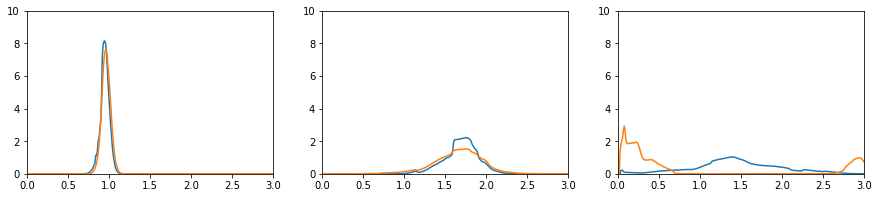

In [203]:
# load the PDFs into 
PDF_PATH = '/nobackup/c1029594/CANDELS_AGN_merger_data/Data - All Fields/GOODSS_OPTIMIZED03/'
EX1_1_file = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID10889.pzd'
EX1_2_file = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID02556.pzd'
EX2_1_file = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID05887.pzd'
EX2_2_file = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID18641.pzd'
# EX3_1_file = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID27161.pzd'
# EX3_2_file = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID17408.pzd'
EX3_1_file = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID27141.pzd'
EX3_2_file = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID17412.pzd'

# read the PDFs
# EXAMPLE 1
EX1_1 = pd.read_csv(EX1_1_file, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                          'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
EX1_2 = pd.read_csv(EX1_2_file, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                          'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
z = np.array(EX1_1['z'])
EX1_1_PDF = np.array(EX1_1['mFDa4'])
EX1_2_PDF = np.array(EX1_2['mFDa4'])

# EXAMPLE 2
EX2_1 = pd.read_csv(EX2_1_file, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                          'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
EX2_2 = pd.read_csv(EX2_2_file, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                          'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
EX2_1_PDF = np.array(EX2_1['mFDa4'])
EX2_2_PDF = np.array(EX2_2['mFDa4'])


# EXAMPLE 3
EX3_1 = pd.read_csv(EX3_1_file, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                          'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
EX3_2 = pd.read_csv(EX3_2_file, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                          'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
EX3_1_PDF = np.array(EX3_1['mFDa4'])
EX3_2_PDF = np.array(EX3_2['mFDa4'])



# plot these PDFs
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

ax[0].plot(z, EX1_1_PDF)
ax[0].plot(z, EX1_2_PDF)
ax[0].set_xlim(0,3)
ax[0].set_ylim(0,10)

ax[1].plot(z, EX2_1_PDF)
ax[1].plot(z, EX2_2_PDF)
ax[1].set_xlim(0,3)
ax[1].set_ylim(0,10)

ax[2].plot(z, EX3_1_PDF)
ax[2].plot(z, EX3_2_PDF)
ax[2].set_xlim(0,3)
ax[2].set_ylim(0,10)

plt.show()


In [204]:
# function for probabilistic pair count
def pair_prob(Pz1, Pz2):
    # calculate pair prob
    a = (2.0 * Pz1 * Pz2) 
    b = (Pz1 + Pz2)
    zz = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    Np = sum(zz)/100
    return Np, zz # return the combined redshift probability function for plotting

In [205]:
# function for Monte Carlo
def Monte_Carlo(z_all, Pz1, Pz2, n=10000, dv_lim=1000):
    # normalize probabilities to 1 for random.choice
    Pz1 = Pz1 / np.sum(Pz1)
    Pz2 = Pz2 / np.sum(Pz2)
    draw1 = random.choice(z_all, size=n, p=(Pz1))
    draw2 = random.choice(z_all, size=n, p=(Pz2))
    dv_distr = ( (((draw2+1)**2 -1) / ((draw2+1)**2 +1)) - (((draw1+1)**2 -1)/ ((draw1+1)**2 +1)) ) * 2.998e5
    
    frac_pair = len( dv_distr[np.where(np.abs(dv_distr) < dv_lim)]) / len(dv_distr)
    
    return frac_pair, dv_distr # return the distribution as well

In [206]:
def dzdv(v):
    c = 2.998e5 # km/s
    dzdv = (1/c) * ((1- (v/c))**(-1.5)) * ((1+ (v/c))**(-0.5))
    return dzdv

def radvel(z):
    c = 2.998e5 # km/s
    v = c * ( ((z+1)**2 - 1) / ((z+1)**2 + 1) )
    return v

In [213]:
def Convdif(z_all, Pz1, Pz2, dv_lim=1000):
    
    # perform a change of variables into velocity space
    v_all = radvel(z_all)
    Pv1 = Pz1 * dzdv(v_all)
    Pv2 = Pz2 * dzdv(v_all)
    
    # interpolate the velocities to get evenly spaced points like in redshift space
    v_new = np.linspace(0,radvel(10),num=10000)
    fintp1 = interp1d(v_all, Pv1, kind='cubic')
    fintp2 = interp1d(v_all, Pv2, kind='cubic')
    
    # extend the inteprolated array
    all_v_neg = -1*v_new[::-1]
    all_ve = np.concatenate((all_v_neg[:-1], v_new))
    
    # convolve with the symmetrical interpolation values
    v_conv = signal.fftconvolve(fintp2(v_new), fintp1(v_new)[::-1], mode='full')
    v_conv = v_conv / np.trapz(v_conv, x=all_ve) # normalize area

    # integrate velocity convolution to find probability dv within dv_lim
    rnge = tuple(np.where( (all_ve > -dv_lim) & (all_ve < dv_lim)))
    prob = np.trapz(v_conv[rnge], x=all_ve[rnge])
    
    return prob, all_ve, v_conv # return interpolated vels and corresponding convolution for plotting

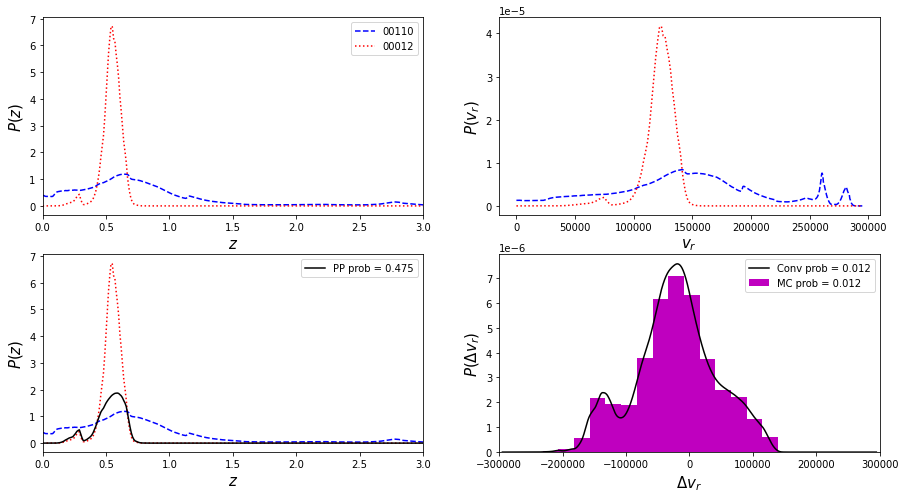

In [214]:
# plot results
ID1 = '00110'
ID2 = '00012'

PDF_PATH = '/nobackup/c1029594/CANDELS_AGN_merger_data/Data - All Fields/GOODSS_OPTIMIZED03/'
file1 = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID'+ID1+'.pzd'
file2 = PDF_PATH+'ALL_OPTIMIZED_PDFS_GOODSS_ID'+ID2+'.pzd'

PDF1_load = pd.read_csv(file1, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                          'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
PDF2_load = pd.read_csv(file2, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                          'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')
z = np.array(PDF1_load['z'])
PDF1 = np.array(PDF1_load['mFDa4'])
PDF2 = np.array(PDF2_load['mFDa4'])

# perform a change of variables into velocity space
v_all = radvel(z)
Pv1 = PDF1 * dzdv(v_all)
Pv2 = PDF2 * dzdv(v_all)

# get probabilities and plotting data from each method's function
pp_prob, pp_Zz = pair_prob(PDF1, PDF2)
# quickly calculate the cumulative integral of Zz
cum_Zz = np.zeros(pp_Zz.shape)
for i in range(0, len(pp_Zz)):
    cum_Zz[i] = np.sum(pp_Zz[:i])/100
    
MC_prob, MC_dv = Monte_Carlo(z, PDF1, PDF2)

Cv_prob, Cv_ve, Cv_dv = Convdif(z, PDF1, PDF2)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
# first simply plot two PDFs in redshift space
ax[0,0].plot(z, PDF1, color='b', linestyle='--', label=ID1)
ax[0,0].plot(z, PDF2, color='r', linestyle=':', label=ID2)
ax[0,0].set_xlim(0,3)
ax[0,0].set_xlabel('$z$', fontsize=15)
ax[0,0].set_ylabel('$P(z)$', fontsize=15)
ax[0,0].legend()

# next plot the distributions in velocity space
ax[0,1].plot(v_all, Pv1, color='b', linestyle='--')
ax[0,1].plot(v_all, Pv2, color='r', linestyle=':')
ax[0,1].set_xlabel('$v_r$', fontsize=15)
ax[0,1].set_ylabel('$P(v_r)$', fontsize=15)

# now the PDFs plotted with combined z function and it's cumulative integral
ax[1,0].plot(z, PDF1, color='b', linestyle='--')
ax[1,0].plot(z, PDF2, color='r', linestyle=':')
ax[1,0].plot(z, pp_Zz, color='black', label='PP prob = '+str(np.round(pp_prob,3)))
# ax[1,0].plot(z, cum_Zz, '--')
ax[1,0].legend()
ax[1,0].set_xlim(0,3)
ax[1,0].set_xlabel('$z$', fontsize=15)
ax[1,0].set_ylabel('$P(z)$', fontsize=15)

# plot the dv distribution from MC method with the apporximation from the convolution
ax[1,1].hist(MC_dv, bins=15, density=True, color='m', label='MC prob = '+str(np.round(MC_prob,3)))
ax[1,1].plot(Cv_ve, Cv_dv, color='black', label='Conv prob = '+str(np.round(Cv_prob,3)))
ax[1,1].legend()
ax[1,1].set_xlim(-300000,300000)
ax[1,1].set_xlabel('$\Delta$$v_r$', fontsize=15)
ax[1,1].set_ylabel('$P($$\Delta$$v_r$$)$', fontsize=15)

plt.show()

## Sandbox

In [113]:
# function for convolutions
def ConvolutionV(z_all, Pz1, Pz2): # redshift -> vel convolutions
    
    # change of variables P(z) -> P(v)
    v_all = radvel(z_all)
    Pv1 = Pz1 * dzdv(v_all)
    Pv2 = Pz2 * dzdv(v_all)
    # normalize:
    # Pv1 = Pv1/np.sum(Pv1)
    # Pv2 = Pv2/np.sum(Pv2)

    # plt.plot(v_all, Pv1)
    # plt.plot(v_all, Pv2)
    # plt.show()
    
    # will need to artificially make the PDFs longer
    dz = np.round(np.linspace(-0.99, 9.99, 1101, endpoint=True), decimals=2)
    # move into velocity space too
    dv = radvel(dz)
        
    # shift the second PDF: add 500 spaces to each end of it AND move to velocity space
    zadd_neg = np.round(np.linspace(-0.99, 0, 100, endpoint=False), decimals=2)
    # print(zadd_neg)
    vadd_neg = radvel(zadd_neg)
    # print(vadd_neg)
    Pvadd_neg = np.zeros_like(vadd_neg)
    zadd_pos = np.round(np.linspace(10.01, 20, 1000, endpoint=False), decimals=2)
    vadd_pos = radvel(zadd_pos)
    Pvadd_pos = np.zeros_like(vadd_pos)
    
    # now add these onto Pz1 and normalize
    long_v = np.concatenate((vadd_neg, v_all, vadd_pos))
    long_Pv2 = np.concatenate((Pvadd_neg, Pv2, Pvadd_pos))
    nPv2 = long_Pv2 / np.sum(long_Pv2)
        
#     plt.plot(np.arange(0,2001,1), long_v)
#     plt.show()
    
    dv_distr = np.zeros(len(dv))
    dv_conv = np.zeros(len(dv))
    for i, dist in enumerate(dv):
        # shift the second PDF: find the index of long_z where dist is
        v_idx = i # function doesn't know where to start, why not just start at i?
        g_idx = v_idx # this dumb, but fixes tuple issue with np.where
        shift_Pv2 = nPv2[g_idx:g_idx+1001]
        # plt.plot(v_all, shift_Pv2)
        # plt.plot(v_all, Pv1)
        # plt.show()
        # integrate / take the sum
        # want to multiply all of PDF1 from (-10,10) with PDF2 (-10+dz, 10+dz)
        P12 = shift_Pv2*Pv1
        dv_distr[i] = np.sum(P12)
        # do a fft convolution here too
        P12_conv = signal.fftconvolve(Pv1, shift_Pv2, mode='same')
        dv_conv[i] = np.sum(P12)
    
    # normalize again and return with dz array
    dv_distr = dv_distr/np.sum(dv_distr)
    dv_conv = dv_conv/np.sum(dv_conv)
    return dv, dv_distr, dv_conv, v_all, Pv1, Pv2

In [114]:
# function for convolutions
def Convolution(z_all, Pz1, Pz2): # redshift convolution
    
    # will need to artificially make the PDFs longer
    dz = np.round(np.linspace(-10, 10, 2001, endpoint=True), decimals=2)
    
    # shift the second PDF: add 500 spaces to each end of it
    zadd_neg = np.round(np.linspace(-10, 0, 1000, endpoint=False), decimals=2)
    Pzadd_neg = np.zeros_like(zadd_neg)
    zadd_pos = np.round(np.linspace(10.01, 20, 1000), decimals=2)
    Pzadd_pos = np.zeros_like(Pzadd_neg)
    # now add these onto Pz1 and normalize
    long_z = np.concatenate((zadd_neg, z_all, zadd_pos))
    long_Pz2 = np.concatenate((Pzadd_neg, Pz2, Pzadd_pos))
    nPz2 = long_Pz2 / np.sum(long_Pz2)
    
    dz_distr = np.zeros(len(dz))
    dz_conv = np.zeros(len(dz))
    for i, dist in enumerate(dz):
        # shift the second PDF: find the index of long_z where dist is
        z_idx = np.where(long_z == dist)
        g_idx = z_idx[0][0] # this dumb, but fixes tuple issue with np.where
        shift_Pz2 = nPz2[g_idx:g_idx+1001]
        # integrate / take the sum
        # plt.plot(z_all, shift_Pz2)
        # plt.plot(z_all,Pz1)
        # plt.show()
        # plt.close()
        # want to multiply all of PDF1 from (-10,10) with PDF2 (-10+dz, 10+dz)
        P12 = shift_Pz2*Pz1
        dz_distr[i] = np.sum(P12)
        # do a fft convolution here too
        P12_conv = signal.fftconvolve(Pz1, shift_Pz2, mode='same')
        dz_conv[i] = np.sum(P12)
    
    # normalize again and return with dz array
    dz_distr = dz_distr/np.sum(dz_distr)
    dz_conv = dz_conv/np.sum(dz_conv)
    return dz, dz_distr, dz_conv

Convolution probability: 0.2505503584100188


/home/c1029594/virtualenv/3.6.9/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


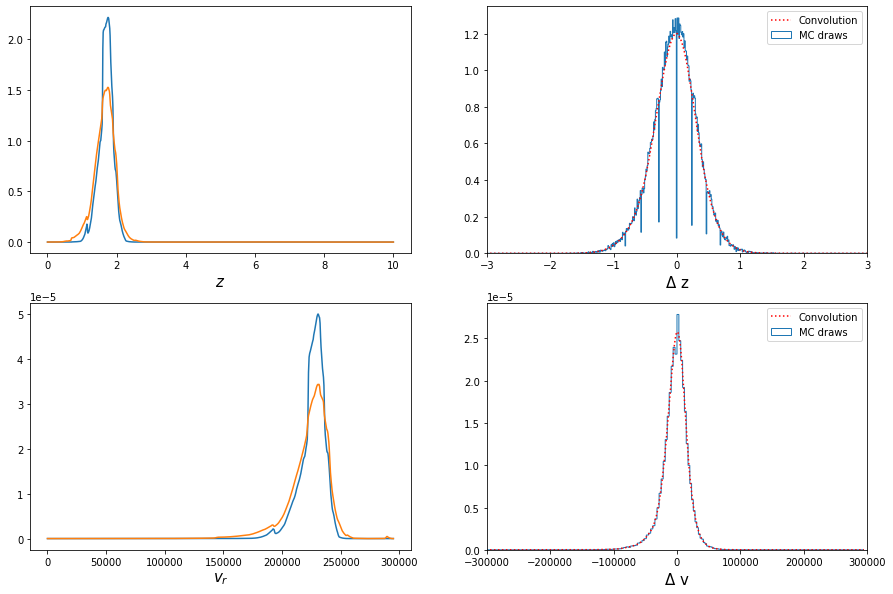

In [120]:
PDF1 = EX2_1_PDF
PDF2 = EX2_2_PDF
dv_lim = 5000

dv, dv_distr, dv_conv, v_all, Pv1, Pv2 = ConvolutionV(z, PDF1, PDF2)
dz, dz_distr, dz_conv = Convolution(z, PDF1, PDF2)

all_v = radvel(z)
all_v_neg = -1*all_v[::-1]
v = np.concatenate((all_v_neg[:-1], all_v))

# new way I just discovered:
z_conv = signal.fftconvolve(PDF2, PDF1[::-1], mode='full')
z_conv = z_conv / np.trapz(z_conv, x=np.arange(-10,10.01,0.01))
# v_conv = signal.fftconvolve(Pv2, Pv1[::-1], mode='full')
# v_conv = v_conv / np.trapz(v_conv, x=v)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

# interpolate the velocities
v_new = np.linspace(0,radvel(10),num=10000)
fcubic1 = interp1d(all_v, Pv1, kind='cubic')
fcubic2 = interp1d(all_v, Pv2, kind='cubic')

all_v_neg = -1*v_new[::-1]
all_vc = np.concatenate((all_v_neg[:-1], v_new)) # extend interpolated velocities

# convolve with the symmetrical interpolation values
v_conv = signal.fftconvolve(fcubic2(v_new), fcubic1(v_new)[::-1], mode='full')
v_conv = v_conv / np.trapz(v_conv, x=all_vc) # normalize area

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

# normalize areas
dz_distr = dz_distr / np.trapz(dz_distr, x=dz) # normalize area <- BE CAREFUL WITH THIE ELSEWHERE
dz_conv = dz_conv / np.trapz(dz_conv, x=dz)

# dv_distr = dv_distr / np.trapz(dv_distr, x=dv) # normalize area <- BE CAREFUL WITH THIE ELSEWHERE
# dv_conv = dv_conv / np.trapz(dv_conv, x=dv)

# integrate velocity convolution
rnge = tuple(np.where( (all_vc > -dv_lim) & (all_vc < dv_lim)))
num = np.trapz(v_conv[rnge], x=all_vc[rnge])
print('Convolution probability:', num)

frac, MC_dv, MC_dz = Monte_Carlo(z, PDF1, PDF2)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
# plot the distributions first
# ax[0].plot(z, PDF1)
# ax[0].plot(z, PDF2)
# # ax[0].set_xlim()
# ax[0].set_xlim(0,3)
# ax[0].set_ylim(0,0.1)
# ax[0].set_xlabel('z', fontsize=15)

ax[0,0].plot(z, PDF1)
ax[0,0].plot(z, PDF2)
ax[0,0].set_xlabel('$z$', fontsize=15)

ax[0,1].hist(MC_dz, bins=dz, histtype='step', density=True, label='MC draws')
ax[0,1].plot(dz, z_conv, linestyle=':', color='r', label='Convolution')
ax[0,1].set_xlim(-3,3)
# ax[0,1].set_ylim(0,8)
ax[0,1].legend()
ax[0,1].set_xlabel('$\Delta$ z', fontsize=15)

ax[1,0].plot(v_all, Pv1)
ax[1,0].plot(v_all, Pv2)
ax[1,0].set_xlabel('$v_r$', fontsize=15)

ax[1,1].hist(MC_dv, bins=dv, histtype='step', density=True, label='MC draws')
# ax[1,1].plot(dv, dv_conv, linestyle=':', color='r', label='Convolution')
ax[1,1].plot(all_vc, v_conv, linestyle=':', color='r', label='Convolution')
ax[1,1].set_xlim(-300000,300000)
ax[1,1].legend()
ax[1,1].set_xlabel('$\Delta$ v', fontsize=15)


# ax[1].plot((dz_lim,dz_lim),(0,10), color='black', linestyle='--')
# ax[1].plot((-dz_lim,-dz_lim),(0,10), color='black', linestyle='--')

plt.show()

# right so this is right, just need to transform Pz -> vel

In [116]:
MC_prob1, vel, red = Monte_Carlo(z, EX1_1_PDF, EX1_2_PDF)
MC_prob2, vel, red = Monte_Carlo(z, EX2_1_PDF, EX2_2_PDF)
MC_prob3, vel, red = Monte_Carlo(z, EX3_1_PDF, EX3_2_PDF)

print('###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###')
print('EXAMPLE 1')
print('PROB COUNT -----> p = {}'.format(pair_prob(EX1_1_PDF, EX1_2_PDF)))
print('MONTE CARLO ----> p = {}'.format(MC_prob1))
print('###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###')
print('EXAMPLE 2')
print('PROB COUNT -----> p = {}'.format(pair_prob(EX2_1_PDF, EX2_2_PDF)))
print('MONTE CARLO ----> p = {}'.format(MC_prob2))
print('###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###')
print('EXAMPLE 3')
print('PROB COUNT -----> p = {}'.format(pair_prob(EX3_1_PDF, EX3_2_PDF)))
print('MONTE CARLO ----> p = {}'.format(MC_prob3))
print('###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###')

###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###
EXAMPLE 1
PROB COUNT -----> p = 97.68658385628954
MONTE CARLO ----> p = 0.49244
###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###
EXAMPLE 2
PROB COUNT -----> p = 95.24850206684646
MONTE CARLO ----> p = 0.25122
###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###
EXAMPLE 3
PROB COUNT -----> p = 0.20058071321821813
MONTE CARLO ----> p = 0.0
###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###


In [70]:
2000*(2.8e-6)

0.0056

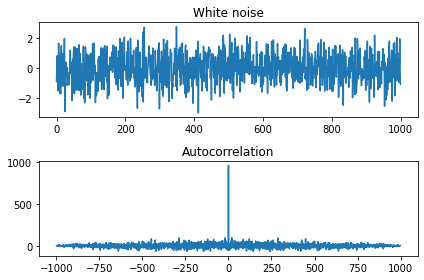

In [13]:
from scipy import signal
rng = np.random.default_rng()
sig = rng.standard_normal(1000)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')

import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(np.arange(-len(sig)+1,len(sig)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()
fig.show()

In [18]:
# len(sig[::-1])

[6, 5, 4, 3, 2, 1]

In [43]:
autocorr = signal.fftconvolve(EX3_1_PDF, EX3_2_PDF[::-1], mode='full')

In [44]:
len(autocorr)

2001

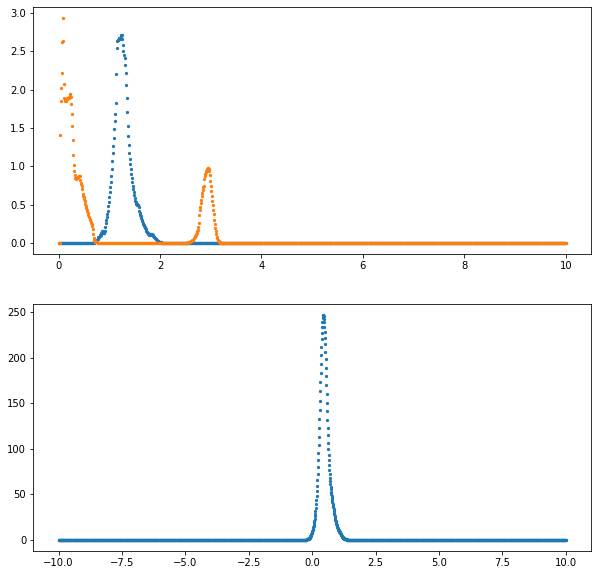

In [72]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(10,10))
ax[0].scatter(z,EX3_1_PDF, s=5)
ax[0].scatter(z,EX3_2_PDF, s=5)
ax[1].scatter(np.arange(-10,10.01,0.01), autocorr, s=5)
plt.show()

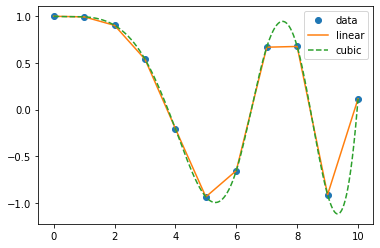

In [76]:
# perhaps some interpolate business?
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=1000, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

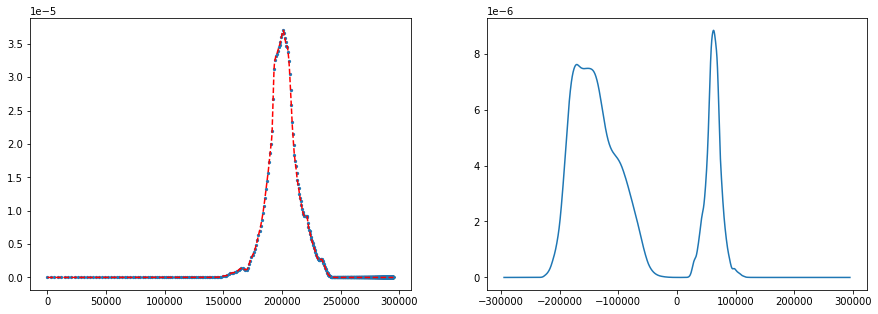

In [97]:
PDF1 = EX3_1_PDF
PDF2 = EX3_2_PDF
dz_lim = 1000

dv, dv_distr, dv_conv, v_all, Pv1, Pv2 = ConvolutionV(z, PDF1, PDF2)
dz, dz_distr, dz_conv = Convolution(z, PDF1, PDF2)

all_v = radvel(z)
# all_v_neg = -1*all_v[::-1]
# v = np.concatenate((all_v_neg[:-1], all_v))


# interpolate the velocities
v_new = np.linspace(0,radvel(10),num=1000)
fcubic1 = interp1d(all_v, Pv1, kind='cubic')
fcubic2 = interp1d(all_v, Pv2, kind='cubic')

all_v_neg = -1*v_new[::-1]
all_vc = np.concatenate((all_v_neg[:-1], v_new))

# # new way I just discovered:
# z_conv = signal.fftconvolve(PDF2, PDF1[::-1], mode='full')
# z_conv = z_conv / np.trapz(z_conv, x=np.arange(-10,10.01,0.01))
v_conv = signal.fftconvolve(fcubic2(v_new), fcubic1(v_new)[::-1], mode='full')
v_conv = v_conv / np.trapz(v_conv, x=all_vc)

# plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].scatter(all_v, Pv1, s=5)
ax[0].plot(v_new, fcubic1(v_new), '--', color='r')

ax[1].plot(all_vc, v_conv)
plt.show() # i think I got it... ^^D